In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
sns.set_style("darkgrid")

In [3]:
from military_grants import articles_f, metrics_f

In [4]:
from military_grants import altmetric_f, wos_f

In [5]:
import json

In [6]:
altmetric = pd.DataFrame.from_dict(
        json.loads(altmetric_f.read_text()), orient="columns"
    ).T

In [7]:
wos = pd.read_csv(wos_f, index_col="DOI")

In [ ]:
# len(set(altmetric.index.tolist() + wos[wos.index.isin(articles.DOI)].index.tolist()))

In [33]:
len(set(articles.DOI.tolist() + altmetric.index.tolist()))

6711

In [24]:
wos[wos.index.str.lower().isin(articles.DOI.str.lower())]

,ID,Year,Journal,Discipline,Citations,Relative Citation Score
DOI,,,,,,
10.1016/j.jtemb.2008.03.010,31242132,2008,JOURNAL OF TRACE ELEMENTS IN MEDICINE AND BIOLOGY,Biomedical Research,24,0.584
10.1038/cgt.2008.59,31245510,2009,CANCER GENE THERAPY,Biomedical Research,23,0.385
10.1016/j.juro.2008.08.124,31249023,2009,JOURNAL OF UROLOGY,Clinical Medicine,3,0.164
10.1177/1557988307309323,31254481,2008,AMERICAN JOURNAL OF MENS HEALTH,Health,8,0.398
10.1158/1535-7163.MCT-08-0558,31254972,2008,MOLECULAR CANCER THERAPEUTICS,Clinical Medicine,11,0.268
...,...,...,...,...,...,...
10.1200/JCO.18.01279,64985565,2019,JOURNAL OF CLINICAL ONCOLOGY,Clinical Medicine,1,7.437
10.1038/s41596-018-0113-7,65095898,2019,NATURE PROTOCOLS,Biomedical Research,0,0.000
10.1128/JVI.01952-18,65129113,2019,JOURNAL OF VIROLOGY,Biomedical Research,0,0.000


In [13]:
articles = pd.read_csv(articles_f, index_col="article_id")

dates = ["last_updated", "published_on", "added_on"]
dtypes = {"pmid":"str", "pmc":"str", "altmetric_id": "str", "doi":"str", 'hollis_id':"str", "arxiv_id":"str"}
metrics = pd.read_csv(metrics_f, index_col="doi", parse_dates=dates, dtype=dtypes)


# Load data
# citations = pd.read_csv("/home/asura/Projects/scholcommlab/military-grants/data/external/DOIsResults.csv", index_col="DOI")

# Merge with citations
# metrics = metrics.merge(citations[['Discipline', 'Citations', 'Relative Citation Score', 'Journal']], left_index=True, right_index=True, how="left")

0

In [40]:
n_references = 9027
n_articles_found = articles.shape[0]
n_altmetrics = metrics.altmetric_jid.count()
n_citations = metrics.citations.count()

AttributeError: 'DataFrame' object has no attribute 'citations'

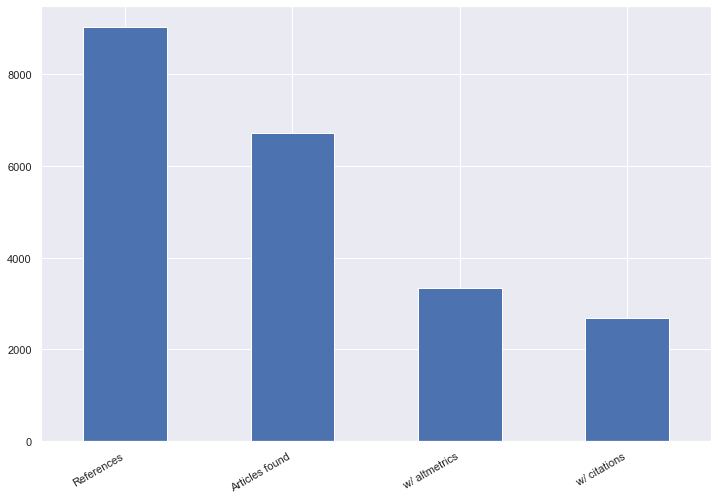

In [143]:
df = pd.DataFrame()
df['count'] = pd.Series([n_references, n_articles_found, n_altmetrics, n_citations], ['References', 'Articles found', 'w/ altmetrics', 'w/ citations'])
df['relative'] = 100*df['count'].div(n_references)
df['count'].plot(kind="bar")
plt.xticks(rotation=30,ha="right");

In [71]:
metrics = metrics.rename(columns={
    'cited_by_accounts_count': 'total',
    'cited_by_posts_count': 'posts_count',
    'cited_by_rh_count': 'research_highlight',
    'cited_by_tweeters_count': 'twitter_accounts',
    'cited_by_patents_count': 'patents',
    'cited_by_msm_count': 'news_outlets',
    'cited_by_feeds_count': 'blogs',
    'cited_by_fbwalls_count': 'fb_pages',
    'cited_by_qna_count': 'qna_count',
    'cited_by_videos_count': 'videos',
    'cited_by_peer_review_sites_count': 'peer_reviews',
    'cited_by_weibo_count': 'weibo',
    'cited_by_gplus_count': 'gplus',
    'cited_by_rdts_count': 'reddit_threads',
    'cited_by_policies_count': 'policies',
    'cited_by_syllabi_count': 'syllabi',
    'cited_by_linkedin_count': 'linkedin',
    'cited_by_wikipedia_count': 'wikipedia',
    'Discipline': 'disc',
    'Citations': 'citations',
    'Relative Citation Score': 'citation_score',
    'Journal': 'journal',
})

In [73]:
counts = metrics.select_dtypes(include=['float64'])

In [141]:
counts.shape

(7372, 23)

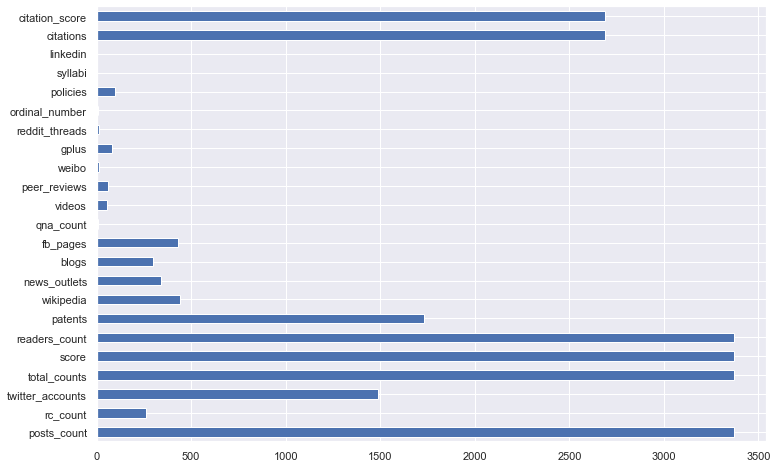

In [140]:
counts.count().div.plot(kind="barh")

In [88]:
pdf

,variable,counts
0,posts_count,2.000
1,posts_count,NaN
2,posts_count,17.000
3,posts_count,NaN
4,posts_count,11.000
...,...,...
169551,citation_score,NaN
169552,citation_score,NaN
169553,citation_score,0.134
169554,citation_score,0.980


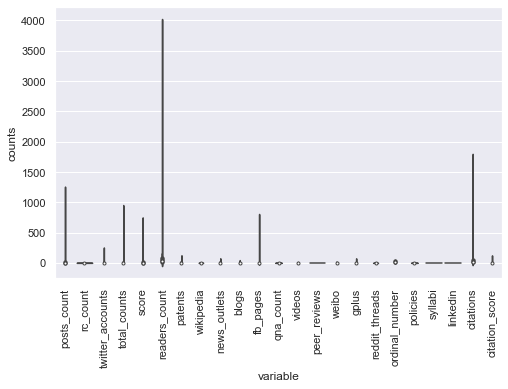

In [91]:
pdf = counts.melt(value_name="counts")
sns.violinplot(x="variable", y="counts", data=pdf)
plt.xticks(rotation=90);

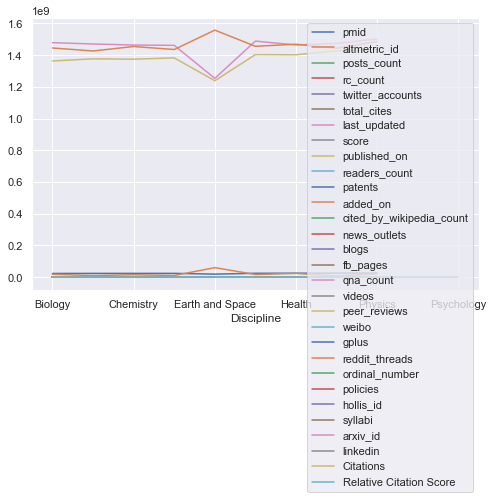

In [26]:
metrics.groupby("Discipline").mean().plot()